# Install libraries:

In [ ]:
#importing libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json
# -*- coding: utf-8 -*-

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing processed brand names through NLP
brandsprocessed3 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brandslistfinal_data.csv')
brandsprocessed=list(brandsprocessed3['0'])

['the original dessert hummus',
 'liketoknowit',
 'jofama  fashion',
 'opullence paris',
 'hellobody italia',
 'keep nature wild',
 'littlewoods',
 'mary kay de mxico oficial',
 'the may fair',
 'evogue']

#Model Section

##READ DATA

In [ ]:
df=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/sponsored_brand_mentions_by_influencer_merge.csv')

In [ ]:
df1=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/post_captions_combined.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Supervised Models



**We ran Linear Regression and Random Forest Regression model.**

##DONT RUN ONLY FOR DATA

In [ ]:
#Linear Regression Model 
#The problem can be formulated as a regression task, with the goal of estimating popularity 
#as the ratio between expected likes and comments over number of media and number of months
#Input requires the following
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. npos=Number of Posts from df
#4. nsbmp=Number of Sponsored Posts from df
#5. nc=total number of comments by account
#6. ne=total emojis from df4
#7. nh=total hashtags from df5
#8. nbmp= total brand mentioning posts
#9. acl=average caption length
#10.nm=number of media
#11. url = has url or not 0 or 1

#Follower growth fgr= (af1-af0)/duration in months  can we get this from the dataset we have
#popularity growth pgr= (pl+nc)/(nm*duration in months)


In [ ]:
combineddf=pd.read_csv("/content/drive/Shareddrives/capstone_prayap_nithyara/influencers_posts_sentiment_emoji_hashtag.csv")

In [ ]:
df3=combineddf.groupby('Account ID_x')['Caption Length'].agg('mean')

In [ ]:
df3=pd.DataFrame(df3)

In [ ]:
df3.columns

Index(['Caption Length'], dtype='object')

In [ ]:
from collections import Counter


In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 175 kB 22.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4b2313e0f5c73b307eb2ae28703216c2e0db4446a384b1847f41155b37d981f6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji

In [ ]:
from typing import Dict
combineddf['total_emoji']=combineddf['emoji'].apply(lambda x: len(''.join(c for c in x if c in emoji.UNICODE_EMOJI['en'])))

In [ ]:
df4=combineddf.groupby('Account ID_x')[['total_hashtags','total_emoji']].agg('sum')

In [ ]:
df4['Caption Length']=df3['Caption Length']

In [ ]:
df4.reset_index(inplace=True)

In [ ]:
df4=df4.rename(columns={'Account ID_x':'Account ID'})

In [ ]:
df5=pd.merge(df,df4,on='Account ID')

In [ ]:
df6=df5[['Account ID','Name','Followers','Posts','Category','Brand Mentioning Posts','Sponsored Brand Mentioning Posts','total_hashtags','total_emoji','Caption Length']]

In [ ]:
df7=pd.read_csv("/content/drive/Shareddrives/capstone_prayap_nithyara/models/all_like_comments.csv")

In [ ]:
df8=df7.groupby('Account ID')[['Like','Comments']].agg('sum')

In [ ]:
df9=pd.merge(df6,df8,on='Account ID')

In [ ]:
df9.to_csv( "account_model.csv", index=False, encoding='utf-8-sig')
!cp account_model.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"

In [ ]:
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/account_model.csv')

In [ ]:
textdf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/influencers_posts_sentiment_emoji_hashtag_cleantext.csv')

In [ ]:
merge=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/influencer_brand_category.csv')

In [ ]:
merge1=merge.groupby('Brand')['Influencer'].apply(list).reset_index()

In [ ]:
merge1['tot_inf']=merge1['Influencer'].apply(lambda x: len(x))

In [ ]:
merge1.sort_values(by='tot_inf',ascending=False,inplace=True)

In [ ]:
merge2=merge1

In [ ]:
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/model_input.csv')

In [ ]:
merge2.reset_index(inplace=True)

In [ ]:
merge2['Influencer'][0]

In [ ]:
merge2['pgr']=0
k=0
for i in merge2['Influencer']:
  total=0
  for j in i:
    try:
      total=total+int(modeldf[modeldf['Account ID']==j]['pgr'])
    except:
      total=total
  pgr=total
  merge2['pgr'].iloc[k]=pgr
  k=k+1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
merge4=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/brand_mention_merge.csv')

In [ ]:
merge4.rename(columns={'Account ID':"Brand"},inplace=True)

In [ ]:
merge7=merge4[['Brand','Followers','Followees','Posts','count']]

In [ ]:
merge7.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
merge5=pd.merge(merge7,merge2, on= "Brand")

In [ ]:
merge5.dropna(inplace=True)

In [ ]:
merge5.rename(columns={'count':'bc'},inplace=True)
#merge5.drop(columns='index',inplace=True)

In [ ]:
merge5.to_csv( "brandmodel_input.csv", index=False, encoding='utf-8-sig')
!cp brandmodel_input.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"

(array([1.7015e+04, 2.8400e+02, 5.7000e+01, 2.3000e+01, 1.5000e+01,
        7.0000e+00, 6.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

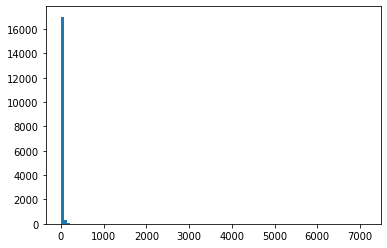

In [ ]:
import matplotlib.pyplot as plt
plt.hist(merge5['tot_inf'],bins=500)

In [ ]:
modeldf=modeldf.fillna(0)

In [ ]:
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. npos=Number of Posts from df
#4. nsbmp=Number of Sponsored Posts from df
#5. nc=total number of comments by account
#6. ne=total emojis from df4
#7. nh=total hashtags from df5
#8. nbmp= total brand mentioning posts
#9. acl=average caption length
#10.nm=number of media
#11. url = has url or not 0 or 1

#Follower growth fgr= (af1-af0)/duration in months  can we get this from the dataset we have
#popularity pgr= (pl+nc)/(nm*duration in months)
modeldf=modeldf.rename(columns={'Followers':'af','Posts':'npos','Brand Mentioning Posts':'nbmp','Sponsored Brand Mentioning Posts':'nspos','total_emoji':'ne','total_hashtags':'nh','Caption Length':'acl','Like':'pl','Comments':'nc'})

In [ ]:
model2df=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/all_media_url.csv')

In [ ]:
model2df['url']=model2df['url'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
model2df1=model2df.groupby('Account ID')[['media','url']].agg('sum')

In [ ]:
model2df1=model2df1.fillna(0)

In [ ]:
model2df1['nm']=model2df1['media'].apply(lambda x: 1 if x==0 else x)

In [ ]:
modeldf1=pd.merge(modeldf,model2df1,on='Account ID')

In [ ]:
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/model_input.csv')

In [ ]:
modeldf['nm']=modeldf1['nm']
modeldf['url']=modeldf1['url']

In [ ]:
modeldf['pgr']=(modeldf['pl']+modeldf['nc'])/(modeldf['nm']*3)

In [ ]:
#EXPORTING INFLUENCER DATASET TO THE FOLDER BEFORE RUNNING MODELS
modeldf.to_csv( "model_input.csv", index=False, encoding='utf-8-sig')
!cp model_input.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"

##READ DATA RUN FOR BRAND SET

In [ ]:
brandmodeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/brandmodel_input.csv')

In [ ]:
brandmodeldf.head()

,Brand,Influencer,tot_inf,pgr,af,afe,npos,bm,bc,ib,isb,posttweets,pretweets
0,delightedbydesserthummus,"['onceuponapumpkin', 'ourpotluckfamily', 'plan...",3,84571,47982,2612,1390,26.0,3.0,26.0,3.0,2.0,0.0
1,liketoknow.it,"['bellemeetsworld', '5feetoffashion', 'chowdow...",3789,206748236,3057208,1506,18984,170782.0,7869.0,14632.0,3789.0,0.0,40.0
2,jofamafashion,"['ianna27', 'skopljak', 'lauraa_drln', 'lauraa...",7,108220,16942,416,1221,66.0,8.0,49.0,7.0,10.0,6.0
3,opullenceparis,"['theivorydiary', 'theivorydiary', 'theivorydi...",5,429985,44553,1714,502,44.0,7.0,34.0,5.0,0.0,0.0
4,hellobody_it,"['enzagreco_', 'chechurodriguez_real', 'iana_9...",22,2247299,164530,173,872,193.0,24.0,152.0,22.0,0.0,0.0


In [ ]:
#sns pairplot
import seaborn as sns
# sns.pairplot(brandmodeldf)

In [ ]:
#1. af=account followers from df
#2. afe=account followees from df
#3. npos=Number of posts from df
#4. bc= total sponsored brand mentioning posts
#5. tot_inf=Total number of influencers
#6. bm = total number of brand mentioning posts
#7. ib = influencers mentioning brand
#8. isb = influencers sponsored mentioning brand
#popularity pgr= total pgr from all influencers employed by the brand

In [ ]:
brandmodeldf.rename(columns={'Followers':'af','Followees':'afe','Posts':'npos'},inplace=True)

In [ ]:
from sklearn import preprocessing
import numpy as np
modeldf1=brandmodeldf[['af','afe','npos','bc','tot_inf','bm','ib','isb','pgr']]
modeldf1=pd.DataFrame(preprocessing.normalize(modeldf1))
modeldf1=modeldf1.rename(columns={0:'af',1:'afe',2:'npos',3:'bc',4:'tot_inf',5:'bm',6:'ib',7:'isb',8:'pgr'})
modeldf1.head()

,af,afe,npos,bc,tot_inf,bm,ib,isb,pgr
0,0.493239,0.026850,0.014289,0.000031,0.000031,0.000267,0.000267,0.000031,0.869362
1,0.014785,0.000007,0.000092,0.000038,0.000018,0.000826,0.000071,0.000018,0.999890
2,0.154657,0.003798,0.011146,0.000073,0.000064,0.000602,0.000447,0.000064,0.987898
3,0.103063,0.003965,0.001161,0.000016,0.000012,0.000102,0.000079,0.000012,0.994666
4,0.073017,0.000077,0.000387,0.000011,0.000010,0.000086,0.000067,0.000010,0.997331


In [ ]:
corr=modeldf1.corr(method='spearman')
corr

,af,afe,npos,bc,tot_inf,bm,ib,isb,pgr
af,1.000000,0.163595,0.387190,-0.087759,-0.078243,0.191085,0.185350,-0.078243,-0.975465
afe,0.163595,1.000000,0.797672,0.618749,0.635151,0.598192,0.627395,0.635151,-0.260228
npos,0.387190,0.797672,1.000000,0.583035,0.598722,0.659512,0.680313,0.598722,-0.467759
bc,-0.087759,0.618749,0.583035,1.000000,0.992213,0.765126,0.790030,0.992213,0.015185
tot_inf,-0.078243,0.635151,0.598722,0.992213,1.000000,0.767320,0.804801,1.000000,0.004187
bm,0.191085,0.598192,0.659512,0.765126,0.767320,1.000000,0.975298,0.767320,-0.246359
ib,0.185350,0.627395,0.680313,0.790030,0.804801,0.975298,1.000000,0.804801,-0.244217
isb,-0.078243,0.635151,0.598722,0.992213,1.000000,0.767320,0.804801,1.000000,0.004187
pgr,-0.975465,-0.260228,-0.467759,0.015185,0.004187,-0.246359,-0.244217,0.004187,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


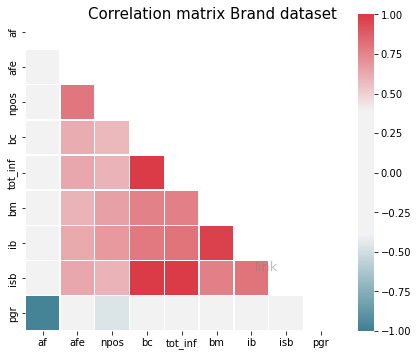

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix Brand dataset', fontsize=15)
ax.text(0.77, 0.2, 'link', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [ ]:
corr=brandmodeldf.corr(method='spearman')
corr

,tot_inf,pgr,af,afe,npos,bm,bc,ib,isb,posttweets,pretweets
tot_inf,1.000000,0.718469,0.213426,-0.024160,0.137854,0.670565,0.990311,0.692902,1.000000,0.077159,0.097443
pgr,0.718469,1.000000,0.272607,-0.040238,0.154082,0.552676,0.707105,0.578180,0.718469,0.073660,0.088351
af,0.213426,0.272607,1.000000,-0.023196,0.616203,0.576696,0.212833,0.575784,0.213426,0.071160,0.064900
afe,-0.024160,-0.040238,-0.023196,1.000000,0.267220,-0.009316,-0.020925,-0.024344,-0.024160,-0.041094,-0.042007
npos,0.137854,0.154082,0.616203,0.267220,1.000000,0.407419,0.142621,0.385995,0.137854,0.026905,0.015925
bm,0.670565,0.552676,0.576696,-0.009316,0.407419,1.000000,0.670850,0.966279,0.670565,0.077672,0.094130
bc,0.990311,0.707105,0.212833,-0.020925,0.142621,0.670850,1.000000,0.679109,0.990311,0.074434,0.094549
ib,0.692902,0.578180,0.575784,-0.024344,0.385995,0.966279,0.679109,1.000000,0.692902,0.090845,0.107760
isb,1.000000,0.718469,0.213426,-0.024160,0.137854,0.670565,0.990311,0.692902,1.000000,0.077159,0.097443
posttweets,0.077159,0.073660,0.071160,-0.041094,0.026905,0.077672,0.074434,0.090845,0.077159,1.000000,0.203267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


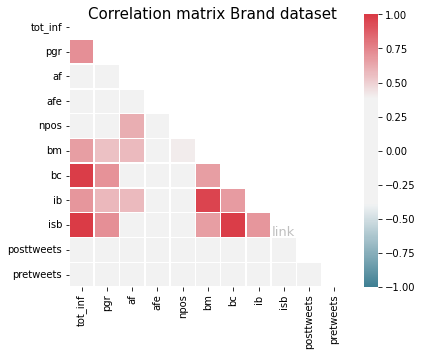

In [ ]:
import seaborn as sns
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix Brand dataset', fontsize=15)
ax.text(0.77, 0.2, 'link', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [ ]:
#test dataframe to check if partial normalizing helps.
test=brandmodeldf.copy()
test['afe']=modeldf1['afe']
test['npos']=modeldf1['npos']
test['pgr']=modeldf1['pgr']

##RANDOM FOREST REGRESSION

###RANDOM FOREST REGRESSION WITHOUT FOLLOWERS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = brandmodeldf[['afe','npos','bc','tot_inf','bm','ib','isb']].values
y = brandmodeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train.reshape(-1,7), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,7))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
"Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,7), y) * 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 505583.66880895634
Mean Squared Error: 3984297093617.3955
Root Mean Squared Error: 1996070.4129908332


'Score of our model is 95.65%'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
#using normalized dataset
modeldf1.head()
X = modeldf1[['afe','npos','bc','tot_inf','bm','ib','isb']].values
y = modeldf1['pgr'].values
 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)
 
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(X_train.reshape(-1,7), y_train.reshape(-1,1))
 
y_pred = regressor.predict(X_test.reshape(-1,7))
y_pred
 
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics
print("Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,7), y) * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of our model is 79.96%
Mean Absolute Error: 0.2417045106315463
Mean Squared Error: 0.10155688912538083
Root Mean Squared Error: 0.3186799164136027


## LINEAR REGRESSION

###Linear Regression statsmodels library



In [ ]:
#statsmodel library
import statsmodels.api as sm
X = brandmodeldf[['afe','npos','bc','tot_inf','bm','ib','isb']]
X = sm.add_constant(X)
#linear regression for actual values
mod = sm.OLS(brandmodeldf['pgr'], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pgr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:10:52   Log-Likelihood:            -2.9427e+05
No. Observations:               18460   AIC:                         5.886e+05
Df Residuals:                   18453   BIC:                         5.886e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.03e+04   2.04e+04     -2.468      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Linear Regression using all normalized values

In [ ]:
#statsmodel library
import statsmodels.api as sm
X = modeldf1[['afe','npos','bc','tot_inf','bm','ib','isb']]
X = sm.add_constant(X)
#linear regression model
mod = sm.OLS(modeldf1['pgr'], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pgr   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     381.9
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:10:53   Log-Likelihood:                -9293.8
No. Observations:               18460   AIC:                         1.860e+04
Df Residuals:                   18453   BIC:                         1.866e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6448      0.003    193.440      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Linear Regression using some normalized values for followers, followees, popularity and actual values for the rest. This was done as a test

In [ ]:
#statsmodel library
import statsmodels.api as sm
X = test[['afe','npos','bc','tot_inf','bm','ib','isb']]
X = sm.add_constant(X)
#linear regression model
mod = sm.OLS(test['pgr'], X)
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    pgr   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     395.1
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:10:53   Log-Likelihood:                -9258.6
No. Observations:               18460   AIC:                         1.853e+04
Df Residuals:                   18453   BIC:                         1.859e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6419      0.003    186.365      0.0

We can see here that the normalized values for followers, number of posts, number of emojis, number of hashtags, number of brand posts, number of sponsored sposts and popularity are shown here. We were going to add tweets number of tweets growth as a proxy for the follower growth. However since it did not provide good information we did not do any follower growth. Also in future pre and post follower data should be collected to incorporate it into the overall popularity.

###LINEAR REGRESSION WITHOUT FOLLOWERS

                Coeff
afe        -38.800961
npos        54.351400
bc       25982.452476
tot_inf    129.079750
bm        -228.078171
ib        2414.449919
isb        129.079750
Mean Absolute Error: 471438.1658101554
Mean Squared Error: 4171717965197.2896
Root Mean Squared Error: 2042478.3879388515
Score of our model is 83.08%
R squared value of our model is 0.8894876001447247


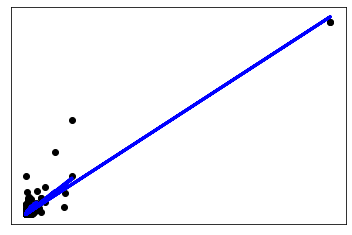

In [ ]:
#import sklearn libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = brandmodeldf[['afe','npos','bc','tot_inf','bm','ib','isb']].values
y = brandmodeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# # Fitting Linear Regression to the dataset

model = LinearRegression()
model.fit(X_train.reshape(-1,7), y_train.reshape(-1,1))


y_pred = model.predict(X_test.reshape(-1,7))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})


#Printing Results
result=pd.DataFrame(model.coef_.reshape(7,1), ['afe','npos','bc','tot_inf','bm','ib','isb'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score of our model is %2.2f%%" % (model.score(X.reshape(-1,7), y) * 100))
print("R squared value of our model is " +str(r2_score(y_test, y_pred)))
# Visualising Linear Regression Results  

# plotting one of the columns with regression 
plt.scatter(X_test.reshape(-1,7)[:,2],y_test, color="black")
plt.plot(X_test.reshape(-1,7)[:,2], y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
# modeldf1=brandmodeldf[['af','afe','npos','bc','tot_inf','bm','ib','isb','pgr']]
# modeldf1=pd.DataFrame(preprocessing.normalize(modeldf1))
# modeldf1=modeldf1.rename(columns={0:'af',1:'afe',2:'npos',3:'bc',4:'tot_inf',5:'bm',6:'ib',7:'isb',8:'pgr'})
# modeldf1.head()

sklearn Linear Regression using Normalized values for followees, followers and poularity and straight values for other variables

[0.64508579]
            Coeff
afe     -0.456930
npos    -1.980163
bc      -0.000918
tot_inf  0.000824
bm       0.000015
ib      -0.000084
isb      0.000824
Mean Absolute Error: 0.3690618832054002
Mean Squared Error: 0.16211613194832206
Root Mean Squared Error: 0.40263647617711196
Score of our model is 10.13%
R squared value of our model is 0.10131216448755054


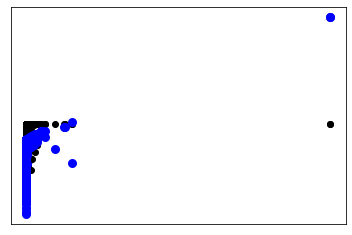

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = test[['afe','npos','bc','tot_inf','bm','ib','isb']].values
y = test['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

model = LinearRegression()
model.fit(X_train.reshape(-1,7), y_train.reshape(-1,1))

y_pred = model.predict(X_test.reshape(-1,7))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2
print(model.intercept_)
result=pd.DataFrame(model.coef_.reshape(7,1), ['afe','npos','bc','tot_inf','bm','ib','isb'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rsq=r2_score(y_test, y_pred)
print("Score of our model is %2.2f%%" % (model.score(X_test.reshape(-1,7), y_test) * 100))
print("R squared value of our model is "+ str(r2_score(y_test, y_pred)))
plt.scatter(X_test.reshape(-1,7)[:,2],y_test, color="black")
plt.scatter(X_test.reshape(-1,7)[:,2], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

##Read Data Run Influencers Dataset

In [ ]:
#read data for influencer dataset
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/model_input.csv')

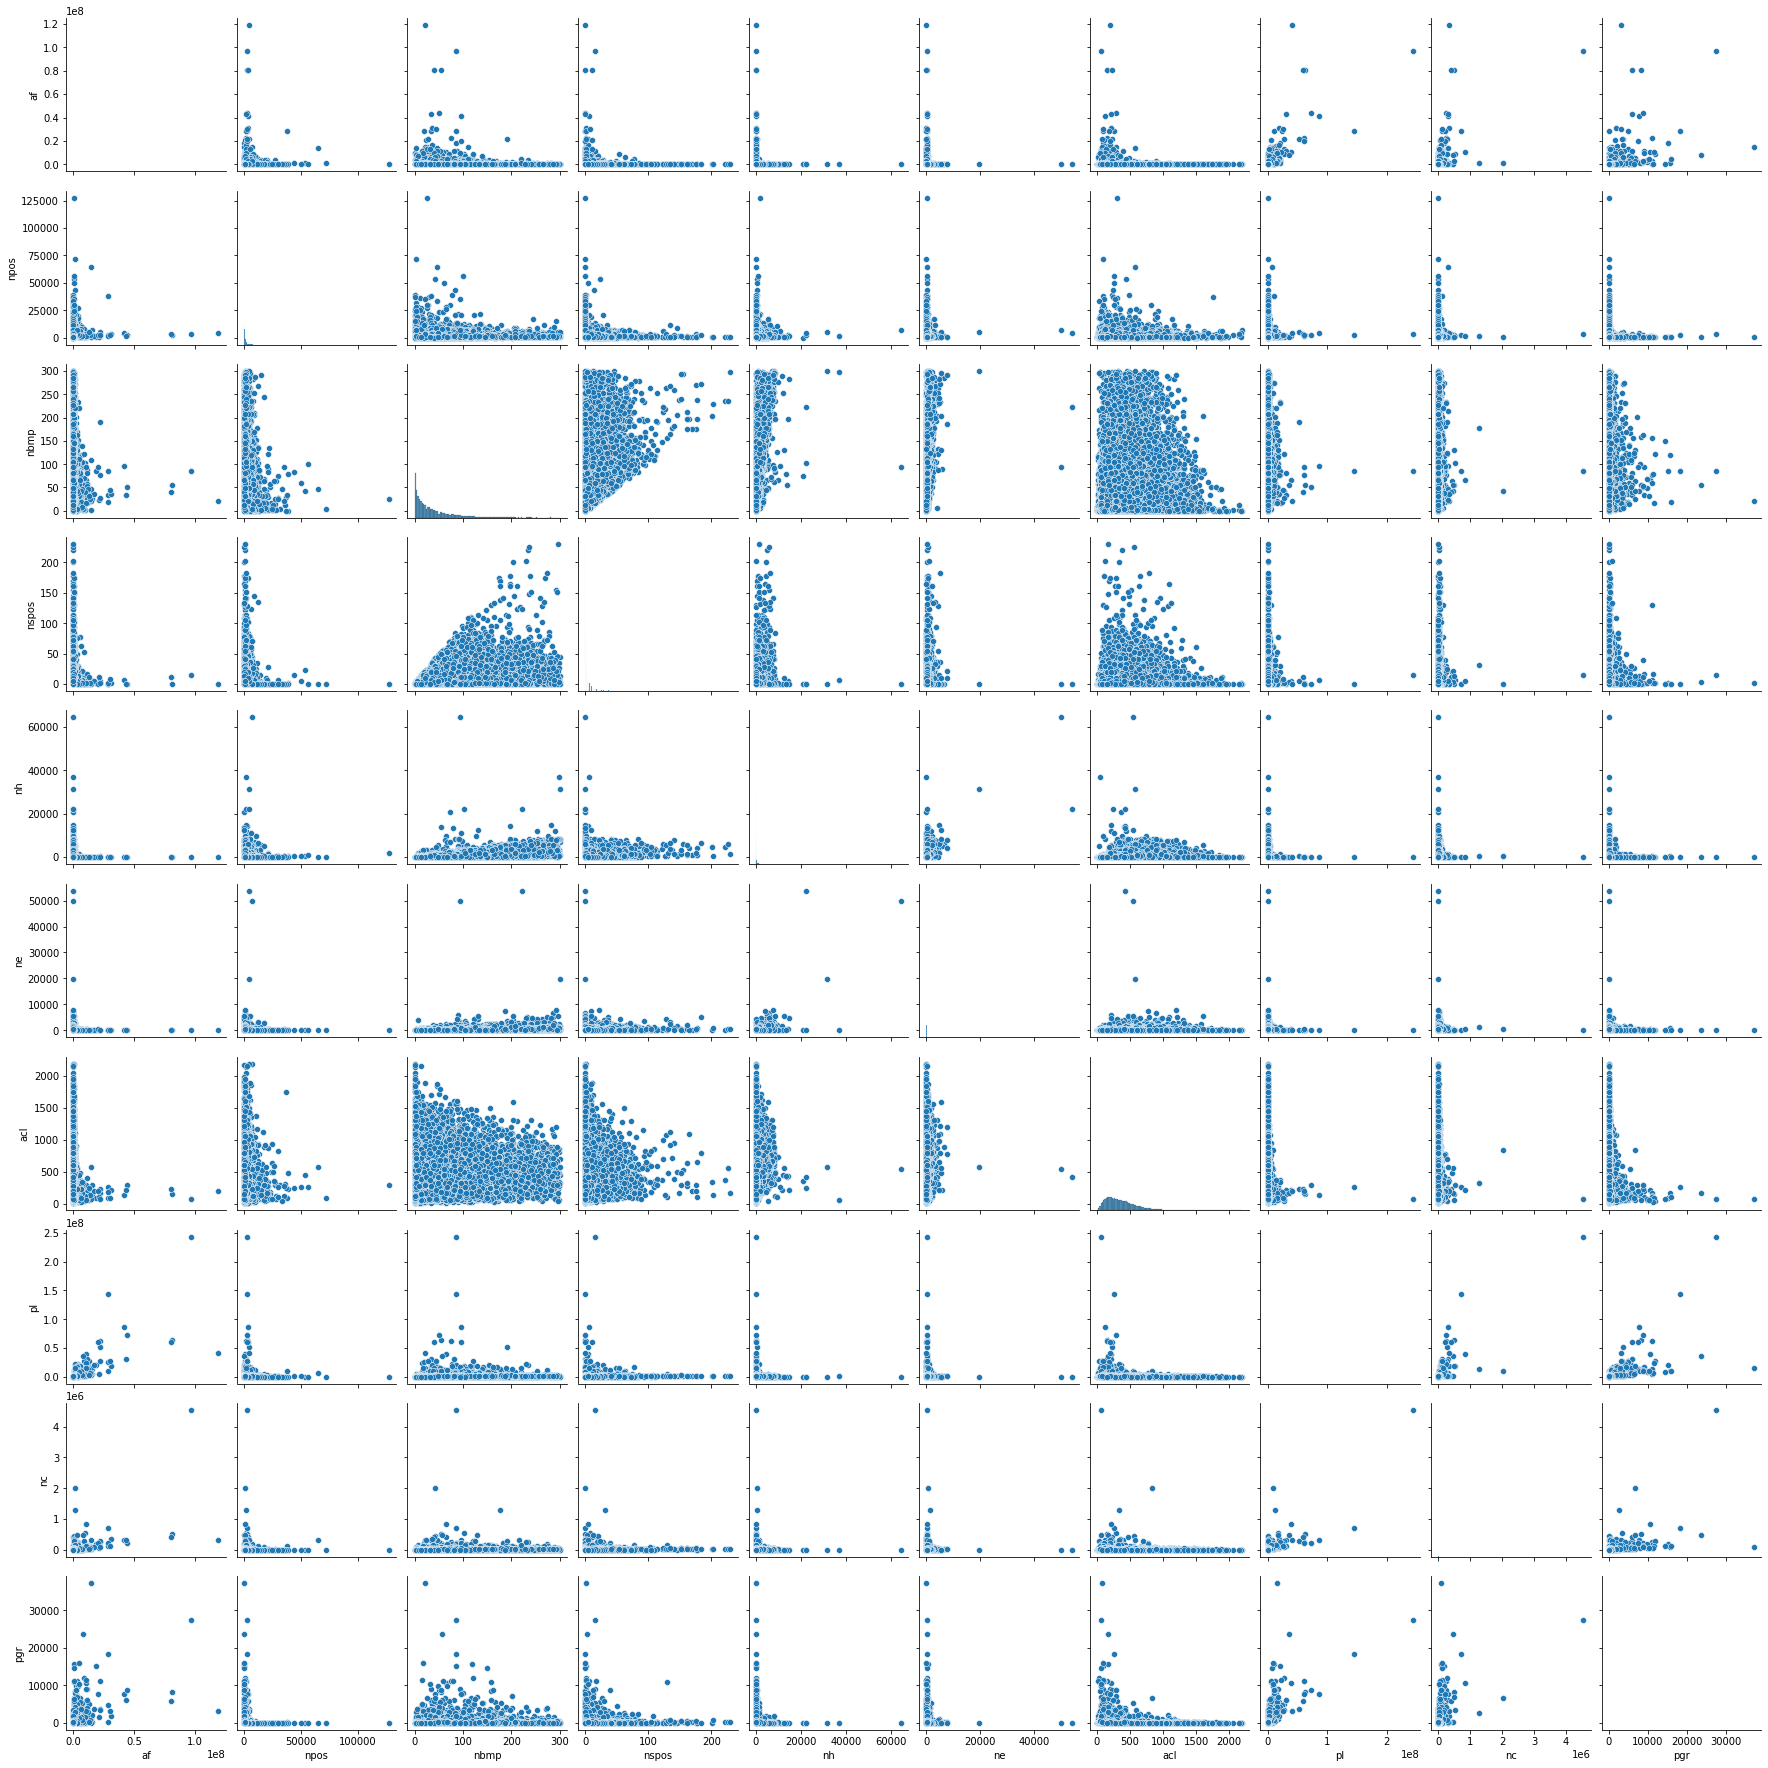

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(modeldf)

In [ ]:
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. npos=Number of Posts from df
#4. nspos=Number of Sponsored Posts from df
#5. nc=total number of comments by account
#6. ne=total emojis from df4
#7. nh=total hashtags from df5
#8. nbmp= total brand mentioning posts
#9. acl=average caption length

#Follower growth fgr= (af1-af0)/duration in months  used tweets as a proxy for this
#popularity pgr= (pl+nc)/(npos*duration in months)

In [ ]:
#Normalize data
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
#normalize values
modeldf1=modeldf[['af','npos','ne','nh','nbmp','nspos','url','acl','pgr']]
modeldf1=pd.DataFrame(preprocessing.normalize(modeldf1))
modeldf1=modeldf1.rename(columns={0:'af',1:'npos',2:'ne',3:'nh',4:'nbmp',5:'nspos',6:'url',7:'acl',8:'pgr'})
modeldf1.head()

,af,npos,ne,nh,nbmp,nspos,url,acl,pgr
0,0.997917,0.048487,0.002120,0.001413,0.000972,0.000265,0.000972,0.042449,0.001010
1,0.531281,0.058371,0.002316,0.001053,0.002737,0.000211,0.000000,0.006346,0.845150
2,0.882960,0.271113,0.088363,0.281824,0.006694,0.000000,0.008702,0.243951,0.003790
3,0.775373,0.626513,0.000000,0.002506,0.000501,0.000501,0.000501,0.079191,0.000802
4,0.991888,0.121265,0.002537,0.001068,0.001603,0.000000,0.001469,0.037829,0.003028


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 38083.79968974695
Mean Squared Error: 17163888792.517155
Root Mean Squared Error: 131011.02546166546


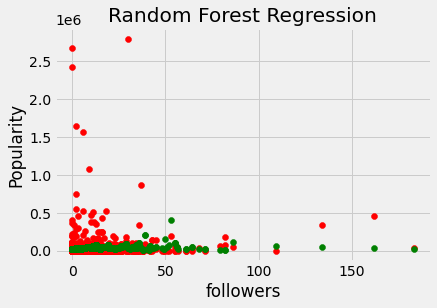

'Score of our model is 0.43%'

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

X = modeldf['nspos'].values
y = modeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('followers')
plt.ylabel('Popularity')
plt.show()

"Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,1), y) * 100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

X = modeldf1[['acl','ne','nh','npos','url']].values
y = modeldf1['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(X_train.reshape(-1,5), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,5))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics
print("Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,5), y) * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of our model is 91.50%
Mean Absolute Error: 0.07333552519513607
Mean Squared Error: 0.017392629467710075
Root Mean Squared Error: 0.13188111869297317


In [ ]:
#Without Normalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

X = modeldf[['acl','ne','nh','nbmp','nspos','url']].values
y = modeldf['pgr'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,6))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df
#PRINT METRICS
from sklearn import metrics
print("Score of our model is %2.2f%%" % (regressor.score(X.reshape(-1,6), y) * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score of our model is 83.87%
Mean Absolute Error: 35050.69102817542
Mean Squared Error: 21999255778.491604
Root Mean Squared Error: 148321.46095050307


In [ ]:
from sklearn.linear_model import LinearRegression
X = modeldf[['nspos']].values
y = modeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


y_pred = model.predict(X_test.reshape(-1,1))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2

result=pd.DataFrame(model.coef_, ['af'], columns = ['Coeff'])
print(result)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
"Score of our model is %2.2f%%" % (model.score(X.reshape(-1,1), y) * 100)

         Coeff
af  980.136195
Mean Absolute Error: 44185.7594090842
Mean Squared Error: 32184207852.933918
Root Mean Squared Error: 179399.575955279


'Score of our model is 0.09%'

In [ ]:
from sklearn.linear_model import LinearRegression
X = modeldf[['acl','ne','nh','nbmp','nspos','url']].values
y = modeldf['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

model = LinearRegression()
model.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))
y_pred = model.predict(X_test.reshape(-1,6))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2

#result=pd.DataFrame(model.coef_, ['af','npos','ne','nh'], columns = ['Coeff'])
print(model.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
"Score of our model is %2.2f%%" % (model.score(X.reshape(-1,6), y) * 100)

[[  -46.70228132    19.00446238   -26.84871205  1402.92987717
   -257.69289333 -1241.08954273]]
Mean Absolute Error: 44034.8923702446
Mean Squared Error: 45259735561.9917
Root Mean Squared Error: 212743.35609365502


'Score of our model is 2.24%'

In [ ]:
from sklearn.linear_model import LinearRegression
X = modeldf1[['acl','ne','nh','nbmp','nspos','url']].values
y = modeldf1['pgr'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

model = LinearRegression()
model.fit(X_train.reshape(-1,6), y_train.reshape(-1,1))
y_pred = model.predict(X_test.reshape(-1,6))
y_pred

df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2

print(model.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
"Score of our model is %2.2f%%" % (model.score(X.reshape(-1,6), y) * 100)

[[ -0.57387658   0.62756164   0.10029179  26.80252988   1.63631706
  -37.24056817]]
Mean Absolute Error: 0.17646446247084724
Mean Squared Error: 0.05384487742011268
Root Mean Squared Error: 0.23204499007759827


'Score of our model is 22.91%'

We can see here that the normalized values for followers, number of posts, number of emojis, number of hashtags, number of brand posts, number of sponsored sposts and popularity are shown here.

#Find the effect of Sponsorship on the influencer posts by performing a t test to check if it was statistically significant. 

In [ ]:
#read data
modeldf.head()

,Account ID,Name,af,npos,Category,nbmp,nspos,nh,ne,acl,pl,nc,pgr,fgr
0,fodmap_friendly_eating,FODMAP Friendly Eating,11299.0,549.0,Creators & Celebrities,11.0,3.0,16,24,480.636364,1661,55,1.041894,2.0
1,paileaa,paige leanne,12615.0,1386.0,Creators & Celebrities,65.0,5.0,25,55,150.676923,58602,1601,14.478836,-40.0
2,a12team,A12 Team,1319.0,405.0,Food & Personal Goods,10.0,0.0,421,132,364.424242,1043,61,0.908642,4.0
3,ilbulgaro89,Andrea Paesetti,1547.0,1250.0,Creators & Celebrities,1.0,1.0,5,0,158.000000,23,1,0.006400,0.0
4,joililikoi,Joie Lee Ruggiero,7427.0,908.0,0,12.0,0.0,8,19,283.250000,3618,123,1.373348,0.0


In [ ]:
#import pingouin
import pingouin as pg

res = pg.ttest(modeldf[modeldf['spons']==1]['pgr'], modeldf[modeldf['spons']==0]['pgr'], correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.641187,38094,two-sided,2.087726e-26,"[44.01, 63.88]",0.110429,4.082e+22,1.0


Null Hypothesis states that sponsored and sponsored influencer posts are equal in terms of the popularity. Alternate Hypothesis is that they are different in terms of popularity. A results of t-test showed that the p-value 0 is less than 0.05 is statistically significant. It indicates strong evidence towards the alternate hypothesis, as there is less than a 5% probability the null is rejected. The results of this sample show that there is a significant difference between the popularity between sponsored and nonsponsored posts.

In [ ]:
!pip install pingouin

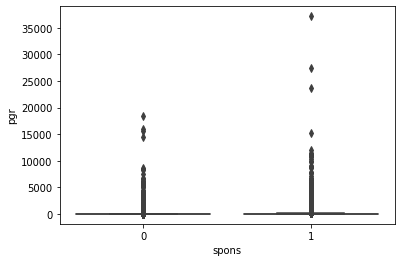

In [ ]:
#import seaborn
import seaborn as sns
sns.boxplot(x='spons', y='pgr', data=modeldf)

Checking Follower growth through tweets

In [ ]:
modeldf['spons']=modeldf['nspos'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
import pingouin as pg

res = pg.ttest(modeldf[modeldf['spons']==1]['fgr'], modeldf[modeldf['spons']==0]['fgr'], correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.839247,38094,two-sided,0.401336,"[-3.65, 9.11]",0.008709,0.017,0.133761


Null Hypothesis is that they are equal in terms of the popularity growth for sponsored and nonsponsored. Alternate Hypothesis is that they are different in terms of popularity growth for sponsored vs nonsponsored. A p-value 0.798 is not less than 0.05 is not statistically significant. It indicates strong evidence towards the null hypothesis, as there is more than a 5% probability the null is correct. The results of this sample show that there is no significant difference between the popularity growth between sponsored and nonsponsored posts.

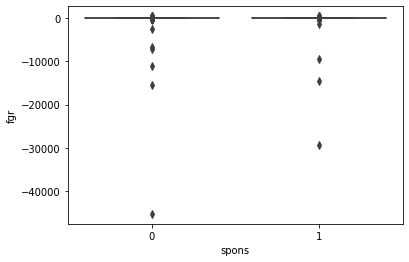

In [ ]:
import seaborn as sns
sns.boxplot(x='spons', y='fgr', data=modeldf)